## Primer parcial Big Data

### Maria Angelica Becerra - T00054451

In [3]:
pip install plotly

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 27.7 MB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install statsmodels

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 9.9 MB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 8.1 MB/s eta 0:00:01
ERROR: google-api-core 1.28.0 has requirement google-auth<2.0dev,>=1.25.0, but you'll have google-auth 1.21.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [144]:
import io
import sys
import glob
from statistics import mean
PATH = '/Users/angge/Documents/BigData/'
DIR_DATA = '../Data/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sys import getsizeof
import plotly.express as px

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


filename = DIR_DATA + 'amazon_com.csv'

In [11]:
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.004764556884765625 sec


In [12]:
data = pd.concat(data_raw)
data.head(10)   #Verificamos que todos los datset tengan las mismas columnas

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Calvin Klein Women's Sheer Marquisette Demi Un...,$36.00,$32.40,https://www.amazon.com/-/dp/B01NAVD98J?th=1&psc=1,Calvin-Klein,Bras,Amazon US,"An unlined demi cup bra featuring sheer, sexy ...",4.5,47,"[ 72% Nylon, 28% Elastane , Imported , hook an...","30B , 30C , 30D , 30DD , 32A , 32B , 32C , 32D...","30B , 30C , 30D , 30DD , 32B , 32C , 32D , 32D...",Bare
1,Wacoal Embrace Lace Bikini Panty,$27.00,$27.00,https://www.amazon.com/-/dp/B0011YQFNK?th=1&psc=1,Wacoal,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.4,91,"[ 100% Nylon , Imported , Hand Wash , 1.2"" hig...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
2,Wacoal Women's Slimline Seamless Minimizer Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B000T3606Q?th=1&psc=1,Wacoal,Bras,Amazon US,Seamless underwire minimizer bra gives great s...,4.3,298,"[ Cups: 100% Polyester; Back: 71% Nylon, 29% S...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...","32DD , 32DDD , 34C , 34D , 34DD , 34DDD , 36C ...",Black
3,Hanky Panky Womens Signature Lace Retro V-Kini,$36.00,$36.00,https://www.amazon.com/-/dp/B003Y6AX0Y?th=1&psc=1,Hanky-Panky,Panties,Amazon US,All-day comfort describes this figure-flatteri...,4.4,46,"[ Made in USA , All-day comfort describes this...","Small , Medium , Large , X-Large","Small , Medium , X-Large",Large
4,Wacoal Women's Red Carpet Strapless Bra,$65.00,$65.00,https://www.amazon.com/-/dp/B01CEBGQA0?th=1&psc=1,Wacoal,Bras,Amazon US,"Red Carpet full figure strapless fits great, s...",4.4,747,"[ 91% Nylon, 9% Spandex , Imported , hook and ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...","30D , 30DD , 30DDD , 30G , 32C , 32D , 32DD , ...",Pecan
5,Wacoal Womens Basic Beauty Contour T-Shirt Bra,$55.00,$55.00,https://www.amazon.com/-/dp/B015YNQHXQ?th=1&psc=1,Wacoal,Bras,Amazon US,Basic beauty contour spacer will offer great s...,4.2,555,"[ 85% Polyester, 15% Spandex , Imported , Hook...","30D , 30DD , 30DDD , 32C , 32D , 32DD , 32DDD ...","30D , 30DDD , 32C , 32D , 32DD , 32DDD , 32G ,...",Black
6,Calvin Klein Women's Seductive Comfort Tailore...,$44.00,$44.00,https://www.amazon.com/-/dp/B00GB81G3A?th=1&psc=1,Calvin-Klein,Bras,Amazon US,Calvin Klein Black is an updated version of CK...,4.2,409,"[ 76% Nylon/24% Elastane , Imported , hook and...","30C , 30D , 30DD , 32A , 32B , 32C , 32D , 32D...","32D , 32DD , 34DD , 36D , 36DD , 36DDD",Black Coffee
7,Calvin Klein Women's Modern Cotton Bikini,$20.00,$20.00,https://www.amazon.com/-/dp/B06XSMGG76?th=1&psc=1,Calvin-Klein,Panties,Amazon US,Soft jersey Calvin Klein Underwear briefs with...,4.7,507,"[ Cute and comfortable everyday bikini , Embos...","X-Small , Small , Medium , Large , X-Large","Small , Medium , Large",Salt Lake
8,Calvin Klein Women's Modern Cotton Bikini,$20.00,$14.65,https://www.amazon.com/-/dp/B01FSE86BM?th=1&psc=1,Calvin-Klein,Panties,Amazon US,Soft jersey Calvin Klein Underwear briefs with...,4.7,507,"[ 53% Cotton, 35% Modal, 12% Elastane , Import...","X-Small , Small , Medium , Large , X-Large","X-Small , Small , Medium , Large",Black
9,Wacoal Womens Basic Beauty Contour T-Shirt Bra,$55.00,$55.00,https://www.amazon.com/-/dp/B00JRPF9TQ?th=1&psc=1,Wacoal,Bras,Amazon US,Basic beauty contour spacer will offer great s...,4.2,555,"[ 85% Polyester, 15% Spandex , Imported , Hook...","30D , 30DD , 30DDD , 32C , 32D , 32DD , 32DDD ...","30D , 30DD , 30DDD , 32C , 32DD , 32DDD , 32G ...",Ivory


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31612 entries, 0 to 31611
Data columns (total 14 columns):
product_name        31612 non-null object
mrp                 31612 non-null object
price               31612 non-null object
pdp_url             31612 non-null object
brand_name          31612 non-null object
product_category    31612 non-null object
retailer            31612 non-null object
description         31612 non-null object
rating              31612 non-null float64
review_count        31612 non-null int64
style_attributes    31612 non-null object
total_sizes         31612 non-null object
available_size      31612 non-null object
color               31612 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 3.4+ MB


In [14]:
filename = DIR_DATA + 'ae_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.002927541732788086 sec


In [15]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy
5,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Slab Gray
6,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L""]",White
7,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M""]",Natural Nude
8,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S""]",True Black
9,Aerie Lace Hi-Rise Boybrief,12.50 USD,12.50 USD,https://www.ae.com/undies-aerie-lace-hi-rise-b...,AERIE,Boybriefs,Ae US,Laced with love and extra comfort. No cheek pe...,4.8,NaN,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M""]",Buff


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28328 entries, 0 to 28327
Data columns (total 14 columns):
product_name        28328 non-null object
mrp                 28328 non-null object
price               28328 non-null object
pdp_url             28328 non-null object
brand_name          28328 non-null object
product_category    28328 non-null object
retailer            28328 non-null object
description         28328 non-null object
rating              21125 non-null float64
review_count        9590 non-null float64
style_attributes    28328 non-null object
total_sizes         28328 non-null object
available_size      28328 non-null object
color               28328 non-null object
dtypes: float64(2), object(12)
memory usage: 3.0+ MB


In [17]:
filename = DIR_DATA + 'btemptd_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.004410505294799805 sec


In [18]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,b.tempt'd Ciao Bella Bralette,$30.00,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s,xl,xs",Bridal White
1,b.tempt'd Ciao Bella Bralette,$30.00,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s,xl,xs",Night
2,b.tempt'd Ciao Bella Bralette,$30.00,$30.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s,xl,xs",Wild Aster
3,b.tempt'd Ciao Bella Bralette,$30.00,$21.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s,xl,xs",Camellia Rose
4,b.tempt'd Ciao Bella Bralette,$30.00,$21.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s,xl,xs",Cappuccino
5,b.tempt'd Ciao Bella Bralette,$30.00,$18.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s,xl,xs",Baja Blue
6,b.tempt'd Ciao Bella Bralette,$30.00,$18.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s,xl,xs",Wineberry
7,b.tempt'd Ciao Bella Bralette,$30.00,$18.00,http://btemptd.wacoal-america.com/b-tempt-d-ci...,WACOAL,COLLECTIONS,Btemptd US,Say “buongiorno!” to this ladylike piece that ...,NaN,NaN,[Wire free bralette • Cut and sew corded lace ...,"XS,S,M,L,XL","l,m,s",Blithe
8,b.charming T-Shirt Bra,$40.00,$40.00,http://btemptd.wacoal-america.com/b-charming-t...,WACOAL,COLLECTIONS,Btemptd US,"That bra you know you need, in a style you def...",NaN,NaN,"[Underwire t-shirt bra,Cups with stretch foam ...","32B,32C,32D,32DD,32DDD,34B,34C,34D,34DD,34DDD,...","32b,32c,32d,32dd,32ddd,34b,34c,34d,34dd,34ddd,...",Antler
9,b.charming T-Shirt Bra,$40.00,$40.00,http://btemptd.wacoal-america.com/b-charming-t...,WACOAL,COLLECTIONS,Btemptd US,"That bra you know you need, in a style you def...",NaN,NaN,"[Underwire t-shirt bra,Cups with stretch foam ...","32B,32C,32D,32DD,32DDD,34B,34C,34D,34DD,34DDD,...","32b,32c,32d,32dd,32ddd,34b,34c,34d,34dd,34ddd,...",Blackened Pearl


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 14 columns):
product_name        3518 non-null object
mrp                 3518 non-null object
price               3518 non-null object
pdp_url             3518 non-null object
brand_name          3518 non-null object
product_category    3518 non-null object
retailer            3518 non-null object
description         3518 non-null object
rating              0 non-null float64
review_count        0 non-null float64
style_attributes    3518 non-null object
total_sizes         3518 non-null object
available_size      3518 non-null object
color               3518 non-null object
dtypes: float64(2), object(12)
memory usage: 384.9+ KB


In [20]:
filename = DIR_DATA + 'calvinklein_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.00333404541015625 sec


In [21]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,logo cotton stretch thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",BLACK
1,logo cotton stretch thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",ASHFORD GREY
2,logo cotton stretch thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",WHITE
3,logo cotton stretch thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,3 FOR 33 PANTY ESSENTIALS,Calvin Klein US,soft cotton stretch fabric and a metallic logo...,NaN,NaN,"[""cotton stretch thong panty"",""metallic elasti...","s,m,l","s,m,l",NAVY
4,essentials thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,the essentials thong features a semi sheer pat...,NaN,NaN,"[""semi sheer thong panty"",""thin elastic logo w...","s,m,l","s,m,l",EPHEMERAL WITH IVORY LACE & LOGO
5,essentials thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,the essentials thong features a semi sheer pat...,NaN,NaN,"[""semi sheer thong panty"",""thin elastic logo w...","s,m,l","s,m,l",TRANSPINK WITH SCANDAL LACE & IVORY
6,essentials thong,$13.00,$13.00,http://www.calvinklein.us/en/womens-clothing/w...,Calvin Klein,Panties,Calvin Klein US,the essentials thong features a semi sheer pat...,NaN,NaN,"[""semi sheer thong panty"",""thin elastic logo w...","s,m,l","s,m,l",DOT FLOW WITH WATERSONE LACE
7,3 pack liner socks,$18.00,$18.00,http://www.calvinklein.us/en/womens-clothing/i...,Calvin Klein,Socks,Calvin Klein US,soft liner socks in a 3-pack featuring a no-sh...,NaN,NaN,"[""cotton stretch liner socks"",""no-show style"",...","xs-s,s-m,m-l","xs-s,m-l",BLACK
8,3 pack liner socks,$18.00,$18.00,http://www.calvinklein.us/en/womens-clothing/i...,Calvin Klein,Socks,Calvin Klein US,soft liner socks in a 3-pack featuring a no-sh...,NaN,NaN,"[""cotton stretch liner socks"",""no-show style"",...","xs-s,s-m,m-l","s-m,m-l",WHITE/BLACK/NUDE
9,3 pack liner socks,$18.00,$18.00,http://www.calvinklein.us/en/womens-clothing/i...,Calvin Klein,Socks,Calvin Klein US,soft liner socks in a 3-pack featuring a no-sh...,NaN,NaN,"[""cotton stretch liner socks"",""no-show style"",...","xs-s,s-m,m-l","xs-s,m-l",BEIGE


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 14 columns):
product_name        4747 non-null object
mrp                 4747 non-null object
price               4747 non-null object
pdp_url             4747 non-null object
brand_name          4747 non-null object
product_category    4747 non-null object
retailer            4747 non-null object
description         4747 non-null object
rating              0 non-null float64
review_count        0 non-null float64
style_attributes    4747 non-null object
total_sizes         4747 non-null object
available_size      4747 non-null object
color               4747 non-null object
dtypes: float64(2), object(12)
memory usage: 519.3+ KB


In [23]:
filename = DIR_DATA + 'hankypanky_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.0032777786254882812 sec


In [24]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Silky 20” A-line Half Slip with Lace,$68,$68,http://www.hankypanky.com/collections/silky-20...,HankyPanky,Collections,Hankypanky US,Hanky Panky Silky is the ideal fabric for unde...,NaN,NaN,"[""Just above-the-knee-length half-slip with el...","[""Select"", ""S"", ""M"", ""L"", ""XL""]","[""Select"", ""S"", ""M"", ""L"", ""XL""]",Black
1,Silky 20” A-line Half Slip with Lace,$68,$68,http://www.hankypanky.com/collections/silky-20...,HankyPanky,Collections,Hankypanky US,Hanky Panky Silky is the ideal fabric for unde...,NaN,NaN,"[""Just above-the-knee-length half-slip with el...","[""Select"", ""S"", ""M"", ""L"", ""XL""]","[""Select"", ""S"", ""M"", ""L"", ""XL""]",Mocha
2,Peek-a-Boo Side Tie Bikini,$30,$30,http://www.hankypanky.com/panties/bridal-peek-...,HankyPanky,Panties,Hankypanky US,Don't go on your honeymoon without this pretty...,NaN,NaN,"[""Bikini-style panty in sheer lace "", "" Featur...","[""Select"", ""S"", ""M"", ""L""]","[""Select"", ""S"", ""M"", ""L""]",Black
3,Peek-a-Boo Side Tie Bikini,$30,$30,http://www.hankypanky.com/panties/bridal-peek-...,HankyPanky,Panties,Hankypanky US,Don't go on your honeymoon without this pretty...,NaN,NaN,"[""Bikini-style panty in sheer lace "", "" Featur...","[""Select"", ""S"", ""M"", ""L""]","[""Select"", ""S"", ""M"", ""L""]",Light Ivory
4,All Tied Up Tie Front Bralette,$59,$59,http://www.hankypanky.com/collections/all-tied...,HankyPanky,Collections,Hankypanky US,All Tied Up in ribbons and lace.,NaN,NaN,"[""Bralette in scalloped cross-dyed lace"", "" Fl...","[""Select"", ""XS"", ""S"", ""M""]","[""Select"", ""XS"", ""S"", ""M""]",Black Plum
5,30 Pack Original Rise Thongs in Lucite Jar,$615,$615,http://www.hankypanky.com/thongs/30-pack-origi...,HankyPanky,Thongs,Hankypanky US,For the ultimate Hanky Panky collector! This l...,NaN,NaN,"[""One-size thong in our signature stretch lace...","[""Select"", ""One Size""]","[""Select"", ""One Size""]",Rainbow
6,3 Pack Exclusive Low Rise Thongs,$64,$64,http://www.hankypanky.com/thongs/3-pack-exclus...,HankyPanky,Thongs,Hankypanky US,Exclusively ours. Three thongs in one little p...,NaN,NaN,"[""Package of three one-size signature stretch ...","[""Select"", ""One Size""]","[""Select"", ""One Size""]",Aloha
7,3 Pack Exclusive Low Rise Thongs,$64,$64,http://www.hankypanky.com/thongs/3-pack-exclus...,HankyPanky,Thongs,Hankypanky US,Exclusively ours. Three thongs in one little p...,NaN,NaN,"[""Package of three one-size signature stretch ...","[""Select"", ""One Size""]","[""Select"", ""One Size""]",Bermuda Nights
8,3 Pack Exclusive Low Rise Thongs,$64,$64,http://www.hankypanky.com/thongs/3-pack-exclus...,HankyPanky,Thongs,Hankypanky US,Exclusively ours. Three thongs in one little p...,NaN,NaN,"[""Package of three one-size signature stretch ...","[""Select"", ""One Size""]","[""Select"", ""One Size""]",Breton Stripe
9,3 Pack Exclusive Low Rise Thongs,$64,$64,http://www.hankypanky.com/thongs/3-pack-exclus...,HankyPanky,Thongs,Hankypanky US,Exclusively ours. Three thongs in one little p...,NaN,NaN,"[""Package of three one-size signature stretch ...","[""Select"", ""One Size""]","[""Select"", ""One Size""]",Capri Bloom


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35005 entries, 0 to 35004
Data columns (total 14 columns):
product_name        35005 non-null object
mrp                 35005 non-null object
price               35005 non-null object
pdp_url             35005 non-null object
brand_name          35005 non-null object
product_category    35005 non-null object
retailer            35005 non-null object
description         35005 non-null object
rating              8849 non-null float64
review_count        8849 non-null float64
style_attributes    35005 non-null object
total_sizes         35005 non-null object
available_size      35005 non-null object
color               35005 non-null object
dtypes: float64(2), object(12)
memory usage: 3.7+ MB


In [26]:
filename = DIR_DATA + 'macys_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.00344085693359375 sec


In [27]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Black
1,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Simple Grid
2,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",White
3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,NaN,NaN,"[""Elastic lace waistband"", ""Lace at front and ...","[""M""]","[""M""]",Regal Sensous
4,Halo Lace Boyshort 870205,$15.00,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,5.0,2.0,"[""Stretch lace waistband"", ""All-over floral la...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Black
5,After Midnight Retro Mesh Bralette 9K7124,$67.00,$67.00,http://www1.macys.com/shop/product/hanky-panky...,Hanky Panky,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Own the night in this sexy bralette from Hanky...,5.0,1.0,"[""Unlined, wireless cups"", ""Non-adjustable mes...","[""XS"", ""S"", ""M""]","[""XS"", ""S"", ""M""]",Black
6,Perfectly Fit Memory Touch Racerback Bra QF1092,$46.00,$46.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The Perfectly Fit Memory Touch Racerback Bra w...,4.2,16.0,"[""Adjustable, racerback straps"", ""Underwire, c...","[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""34A"", ""3...","[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""34A"", ""3...",Bare
7,Perfectly Fit Memory Touch Racerback Bra QF1092,$46.00,$46.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The Perfectly Fit Memory Touch Racerback Bra w...,4.2,16.0,"[""Adjustable, racerback straps"", ""Underwire, c...","[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""34A"", ""3...","[""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""34A"", ""3...",Black
8,Embrace Lace Contour Bra 853191,$60.00,$60.00,http://www1.macys.com/shop/product/wacoal-embr...,Wacoal,Women - Lingerie & Shapewear - Bras,Macys US,The latest style from Wacoal's popular Embrace...,4.5,75.0,"[""Adjustable straps with scalloped edges"", ""Se...","[""30D"", ""30DD"", ""30DDD"", ""32C"", ""32D"", ""32DD"",...","[""30D"", ""30DD"", ""30DDD"", ""32C"", ""32D"", ""32DD"",...",Black
9,Embrace Lace Contour Bra 853191,$60.00,$60.00,http://www1.macys.com/shop/product/wacoal-embr...,Wacoal,Women - Lingerie & Shapewear - Bras,Macys US,The latest style from Wacoal's popular Embrace...,4.5,75.0,"[""Adjustable straps with scalloped edges"", ""Se...","[""30D"", ""30DD"", ""30DDD"", ""32C"", ""32D"", ""32DD"",...","[""30D"", ""30DD"", ""30DDD"", ""32C"", ""32D"", ""32DD"",...",Naturally Nude/Ivory


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40897 entries, 0 to 40896
Data columns (total 14 columns):
product_name        40897 non-null object
mrp                 40897 non-null object
price               40897 non-null object
pdp_url             40897 non-null object
brand_name          40897 non-null object
product_category    40897 non-null object
retailer            40897 non-null object
description         40897 non-null object
rating              26092 non-null float64
review_count        26101 non-null float64
style_attributes    40897 non-null object
total_sizes         40897 non-null object
available_size      40897 non-null object
color               40897 non-null object
dtypes: float64(2), object(12)
memory usage: 4.4+ MB


In [29]:
filename = DIR_DATA + 'shop_nordstrom_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.0031304359436035156 sec


In [30]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,'B Fitting' High Cut Briefs,$15.00,$15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut Supima® cotton brie...",4.2,65.0,"[""79% Supima® cotton, 21% spandex."", ""Hand was...",[nil],[nil],Black
1,'B Fitting' High Cut Briefs,$15.00,$15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut Supima® cotton brie...",4.2,65.0,"[""79% Supima® cotton, 21% spandex."", ""Hand was...",[nil],[nil],Nude
2,'B Fitting' High Cut Briefs,$15.00,$15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut Supima® cotton brie...",4.2,65.0,"[""79% Supima® cotton, 21% spandex."", ""Hand was...",[nil],[nil],White
3,'B Fitting' High Cut Briefs,$15.00,$15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut Supima® cotton brie...",4.2,65.0,"[""79% Supima® cotton, 21% spandex."", ""Hand was...",[nil],[nil],Navy
4,'Skinsense' Seamless High Cut Briefs,$18.00,$18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","[""X-Large"", ""Large"", ""Medium"", ""Small""]","[""X-Large"", ""Large"", ""Medium"", ""Small""]",Black
5,'Skinsense' Seamless High Cut Briefs,$18.00,$18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","[""X-Large"", ""Large"", ""Medium"", ""Small""]","[""Large"", ""Medium""]",Sand
6,'Skinsense' Seamless High Cut Briefs,$18.00,$18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","[""X-Large"", ""Large"", ""Medium"", ""Small""]","[""Medium"", ""Large"", ""X-Large"", ""Small""]",Conch Shell
7,'Annabelle' Lace Garter,$23.00,$23.00,http://shop.nordstrom.com/s/hanky-panky-annabe...,HANKY PANKY,Sexy Lingerie,Nordstrom US,Scalloped lace adorned with a little blue bow ...,NaN,NaN,"["" 77% nylon, 18% spandex, 5% polyester."", ""Ha...",[nil],[nil],White/ Baby Blue
8,Chrystalle Underwire Balconette Bra,$78.00,$78.00,http://shop.nordstrom.com/s/wacoal-chrystalle-...,WACOAL,Sexy Lingerie,Nordstrom US,Stretchy Leavers lace delicately veils this ro...,NaN,NaN,"[""80% nylon, 20% spandex"", ""Hand wash warm, dr...","[""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""...","[""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""...",White
9,'B Smooth' Bikini,$15.00,$15.00,http://shop.nordstrom.com/s/wacoal-b-smooth-bi...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Stretchy fabric shapes a low-rise bikini desig...,4.3,33.0,"[""Cotton-lined gusset."", ""Shirring on back."", ...","[""Small"", ""Medium"", ""Large"", ""X-Large""]","[""Small"", ""Medium"", ""Large"", ""X-Large""]",Black


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12568 entries, 0 to 12567
Data columns (total 14 columns):
product_name        12568 non-null object
mrp                 12568 non-null object
price               12568 non-null object
pdp_url             12568 non-null object
brand_name          12568 non-null object
product_category    12568 non-null object
retailer            12568 non-null object
description         12568 non-null object
rating              7878 non-null float64
review_count        7878 non-null float64
style_attributes    12568 non-null object
total_sizes         12568 non-null object
available_size      12568 non-null object
color               12568 non-null object
dtypes: float64(2), object(12)
memory usage: 1.3+ MB


In [32]:
filename = DIR_DATA + 'us_topshop_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.004269599914550781 sec


In [33]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,MATERNITY Criss Cross Knickers,$20.00,$20.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,These feminine black knickers for maternity fe...,NaN,NaN,NaN,"4,6,8,10,12","4,6,8,10,12",BLACK
1,Floral Lace Triangle Bra,$35.00,$35.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,"In an appealing burnt orange tint, this low ri...",NaN,NaN,NaN,"2,4,6,8,10,12","2,8,10,12",NaN
2,Floral Lace Thong,$20.00,$20.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,"In an appealing burnt orange tint, this low ri...",NaN,NaN,NaN,"2,4,6,8,10,12","2,4,6,8,10,12",NaN
3,Mesh French Knickers,$10.00,$10.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Indulge your playful side with these sheer mes...,NaN,NaN,NaN,"2,4,6,8,10,12,14","4,6,10,12",RASPBERRY
4,Floral Lace Thong,$10.00,$10.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Keep slinky silhouettes seam-free with this la...,3.0,1.0,NaN,"2,4,6,8,10,12","2,4,6,8,10,12",BLACK
5,Embroidered Bralet,$45.00,$45.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,Fall in love with this elegant black bralet co...,NaN,NaN,NaN,"32A,32B,32C,32D,32DD,34A,34B,34C,34D,34DD,36A,...","32A,32B,32C,32D,32DD,34A,34B,34C,34D,34DD,36A,...",BLACK
6,Padded Lace Triangle Bra,$30.00,$30.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,"In a dark nude shade, this elegant padded lace...",NaN,NaN,NaN,"2,4,6,8,10,12","2,4,6,8,10,12",Dark Nude
7,Lace Thong,$10.00,$10.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,"Bubblegum pink lace thong. 89% Nylon, 11% Elas...",1.0,1.0,NaN,"2,4,6,8,10,12,14","2,4,6,8,10,12",Bubblegum Pi
8,Branded Jersey Crop Top,$15.00,$15.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,This simple black lingerie set features a bran...,NaN,NaN,NaN,"2,4,6,8,10,12,14","2,4,6,8,10,12",NaN
9,Branded Jersey Mini Knickers,$10.00,$10.00,http://www.topshop.com/en/tsus/product/clothin...,US TOPSHOP,Lingerie,Topshop US,This simple black lingerie set features a bran...,NaN,NaN,NaN,"2,4,6,8,10,12,14","2,4,6,8,10,12",NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 14 columns):
product_name        3082 non-null object
mrp                 3082 non-null object
price               3082 non-null object
pdp_url             3082 non-null object
brand_name          3082 non-null object
product_category    3082 non-null object
retailer            3082 non-null object
description         3082 non-null object
rating              266 non-null float64
review_count        266 non-null float64
style_attributes    0 non-null float64
total_sizes         3082 non-null object
available_size      3082 non-null object
color               2405 non-null object
dtypes: float64(3), object(11)
memory usage: 337.2+ KB


In [35]:
filename = DIR_DATA + 'victoriassecret_com.csv'
start = time.time()
data_raw = pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.0040209293365478516 sec


In [36]:
data = pd.concat(data_raw)
data.head(10)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,peach melba
1,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,black
2,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,plum dust
3,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,ensign blue
4,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,fair orchid
5,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,windy blue
6,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,coconut white
7,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,peach melba
8,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,black
9,Very Sexy Strappy Lace Thong Panty,$14.50,$14.50,https://www.victoriassecret.com/panties/shop-a...,Victoria's Secret,Strappy Lace Thong Panty,Victoriassecret US,"Lots of cheek peek, pretty lace, a strappy bac...",NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,plum dust


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453386 entries, 0 to 453385
Data columns (total 14 columns):
product_name        453386 non-null object
mrp                 453386 non-null object
price               453386 non-null object
pdp_url             453386 non-null object
brand_name          453386 non-null object
product_category    453386 non-null object
retailer            453386 non-null object
description         453386 non-null object
rating              137734 non-null float64
review_count        137734 non-null float64
style_attributes    0 non-null float64
total_sizes         453386 non-null object
available_size      453386 non-null object
color               453386 non-null object
dtypes: float64(3), object(11)
memory usage: 48.4+ MB


In [38]:
sales1 = DIR_DATA + 'ae_com.csv'
sales2 = DIR_DATA + 'amazon_com.csv'
sales3 = DIR_DATA + 'btemptd_com.csv'
sales4 = DIR_DATA + 'calvinklein_com.csv'    #Concatenamos, esta es una forma de hacerlo
sales5 = DIR_DATA + 'hankypanky_com.csv'
sales6 = DIR_DATA + 'macys_com.csv'
sales7 = DIR_DATA + 'shop_nordstrom_com.csv'
sales8 = DIR_DATA + 'us_topshop_com.csv'
sales9 = DIR_DATA + 'victoriassecret_com.csv'

# merge files
dataFrame = pd.concat(
   map(pd.read_csv, [sales1, sales2, sales3, sales4, sales5, sales6, sales7, sales8, sales9]), ignore_index=True)
#print(dataFrame)
dataFrame.head(100)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Rugged Green
1,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Natural Nude
2,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",True Black
3,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",White
4,Aerie Everyday Loves Lace Cheeky,12.50 USD,12.50 USD,https://www.ae.com/aerie-everyday-loves-lace-c...,AERIE,Cheekies,Ae US,Introducing Everyday Loves™: Made with love. E...,5.0,8.0,"[""Soft lace with the right amount of stretch"",...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Royal Navy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Aerie Boyshort,9.50 USD,9.50 USD,https://www.ae.com/featured-aerie-boyshort-dee...,AERIE,Boyshorts,Ae US,Boy oh boy! The soft and comfy cotton you love...,NaN,NaN,"[""Comfy, stretchy cotton"", ""Aerie undies: Your...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Dark Heather
96,Aerie Boyshort,9.50 USD,9.50 USD,https://www.ae.com/featured-aerie-boyshort-dee...,AERIE,Boyshorts,Ae US,Boy oh boy! The soft and comfy cotton you love...,NaN,NaN,"[""Comfy, stretchy cotton"", ""Aerie undies: Your...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Creme Blue
97,Aerie Boyshort,9.50 USD,9.50 USD,https://www.ae.com/featured-aerie-boyshort-dee...,AERIE,Boyshorts,Ae US,Boy oh boy! The soft and comfy cotton you love...,NaN,NaN,"[""Comfy, stretchy cotton"", ""Aerie undies: Your...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XXL""]",Deep Plum
98,Aerie Shine Boybrief + Boho Lace,12.50 USD,12.50 USD,https://www.ae.com/aerie-shine-boybrief-boho-l...,AERIE,Boybriefs,Ae US,"Shine on. Peace, love & lace. style: 5777-6108...",4.5,NaN,"[""SMOOTH shine fabric + boho lace waistband"", ...","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]","[""XS"", ""S"", ""M"", ""L"", ""XL"", ""XXL""]",Alpha Turquoise


In [39]:
files_joined = os.path.join(DIR_DATA + 'ae_com*.csv') #Combinamos los dataset, esta es otra forma de hacerlo

list_files = glob.glob(files_joined)

dataframe = pd.concat(map(pd.read_csv, list_files), ignore_index=True)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613143 entries, 0 to 613142
Data columns (total 14 columns):
product_name        613143 non-null object
mrp                 613143 non-null object
price               613143 non-null object
pdp_url             613143 non-null object
brand_name          613143 non-null object
product_category    613143 non-null object
retailer            613143 non-null object
description         613143 non-null object
rating              233556 non-null float64
review_count        222030 non-null float64
style_attributes    156675 non-null object
total_sizes         613143 non-null object
available_size      613143 non-null object
color               612466 non-null object
dtypes: float64(2), object(12)
memory usage: 65.5+ MB


In [84]:
data.describe()

,rating,review_count
count,453386.000000,4.533860e+05
mean,1.265533,2.795741e+35
std,1.934585,6.423671e+36
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,3.800000,2.900000e+01
max,5.000000,1.560000e+38


In [85]:
data['product_name'] = data['product_name'].fillna('None')
data['mrp'] = data['mrp'].fillna('None')
data['price'] = data['price'].fillna('None')
data['pdp_url'] = data['pdp_url'].fillna('None')
data['brand_name'] = data['brand_name'].fillna('None')
data['product_category'] = data['product_category'].fillna('None')
data['retailer '] = data['retailer'].fillna('None')
data['description'] = data['description'].fillna('None')
data['rating'] = data['rating'].fillna(0.0)  #normalizar registros
data['review_count'] = data['review_count'].fillna(0.0)
data['style_attributes'] = data['style_attributes'].fillna('None')
data['total_sizes'] = data['total_sizes'].fillna('None')
data['available_size'] = data['available_size'].fillna('None')
data['color'] = data['color'].fillna('None')

In [86]:
dataFrame.dtypes

product_name         object
mrp                  object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

In [87]:
data['product_name'].astype(object)
data['mrp'].astype(object)
data['price'].astype(object)
data['pdp_url'].astype(object) 
data['brand_name'].astype(object)
data['product_category'].astype(object)
data['retailer'].astype(object)   #normalizar tipos de datos
data['description'].astype(object)
data['rating'].astype(float)
data['review_count'].astype(float)
data['style_attributes'].astype(object)
data['total_sizes'].astype(object)
data['available_size'].astype(object)
data['color'].astype(object) 

0           peach melba
1                 black
2             plum dust
3           ensign blue
4           fair orchid
              ...      
453381    coconut white
453382     mulled grape
453383       sheer pink
453384    coconut white
453385     mulled grape
Name: color, Length: 453386, dtype: object

In [88]:
analitic_price = data.groupby("price", as_index=False)['rating'].count()#¿En qué se diferencian los precios según la marca?
analitic_price.head(20)

,price,rating
0,$10.50,45832
1,$12.95,29
2,$12.99,4917
3,$14.50,5411
4,$14.99,12701
5,$15.00,1851
6,$16.50,4166
7,$16.95,24
8,$16.99,5052
9,$17.99,2438


In [89]:
analitic_nameBrand= data.groupby("price", as_index=False)['brand_name'].count()#¿En qué se diferencian los precios según la marca?
analitic_nameBrand.head(10)

,price,brand_name
0,$10.50,45832
1,$12.95,29
2,$12.99,4917
3,$14.50,5411
4,$14.99,12701
5,$15.00,1851
6,$16.50,4166
7,$16.95,24
8,$16.99,5052
9,$17.99,2438


In [90]:
data['color'].value_counts() #¿Cuáles son los colores más utilizados por las diferentes marcas?

Black                            17474
black                            13134
White                            10803
pure black                        7101
Ensign                            6738
                                 ...  
Ibiza Blue                           3
triumph white/ blue                  3
triumph white/pure black             3
black hearts print                   2
black chevron print lace trim        2
Name: color, Length: 1365, dtype: int64

In [92]:
#data.price=data.price.str.replace('[$,₡]','')
#data.head(5)
#data['price'] = data['price'].str.replace('.','')
#data['price'] = data['price'].astype('int')
#data.dtypes

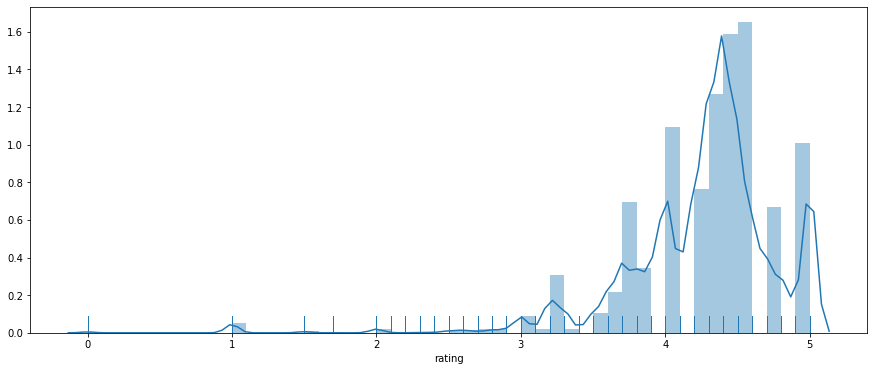

In [94]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(dataFrame['rating'],rug=True)
plt.show()

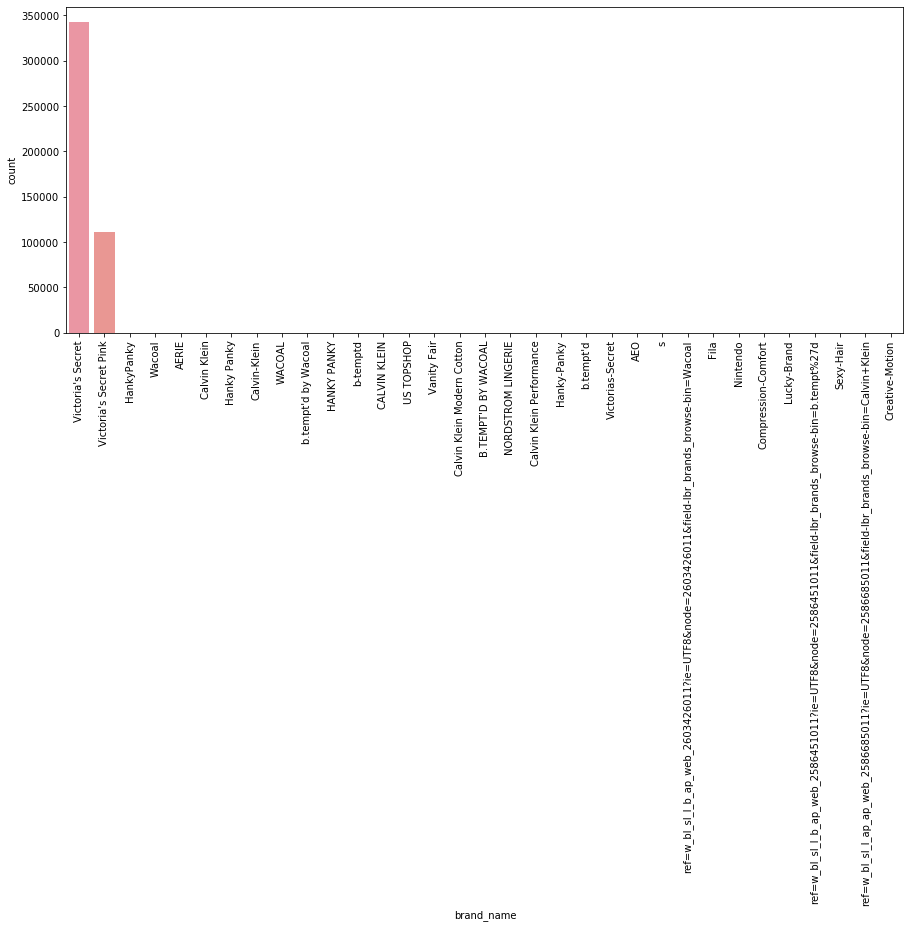

In [137]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='brand_name', order = dataFrame['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

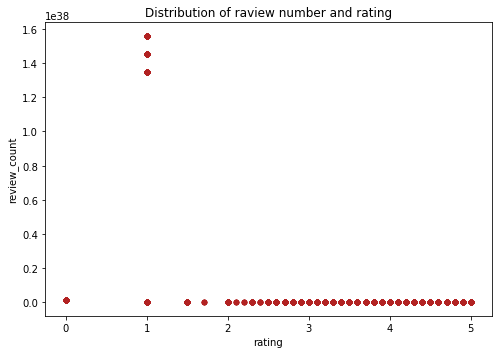

In [136]:
fig, ax = plt.subplots(figsize=(8, 5.40))
dataFrame.plot(
    x    = 'rating',
    y    = 'review_count',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax)
ax.set_title('Distribution of raview number and rating');

In [145]:
dataFrame['review_count'] = dataFrame['review_count'].fillna(0.0)
dataFrame['rating'] = dataFrame['rating'].fillna(0.0)   #correlacion de pearson
corr_test = pearsonr(x = dataFrame['rating'], y =  dataFrame['review_count'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.011121421866488278
P-value:  3.0735695936978702e-18


In [ ]:
X = datos[['bateos']] #dividimos los datos entre el train y el test
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

